In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Importing required libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

Loading Data and Doing Data Preprocessing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Downloads/Amazon_Review_Dataset_Preprocessed.csv', error_bad_lines=False, engine="python")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Final_Test_Data = pd.read_csv('/content/drive/MyDrive/Amazon_Final_Test_Data.csv', error_bad_lines=False, engine="python")
#Final_Test_Data = pd.read_csv('/content/Amazon_Final_Test_Data.csv',error_bad_lines=False , engine="python")

In [ ]:
data_copy = data

In [ ]:
data

id       asins   brand  \
0     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
1     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
2     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
3     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
4     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
...                    ...         ...     ...   
1172  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1173  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1174  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1175  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1176  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   

                                             categories colors  \
0                            Amazon Devices,mazon.co.uk    NaN   
1                            Amazon Devices,mazon.co.uk    NaN   
2                            Amazon Devices,mazon.co.uk    NaN   
3                            Amazon Devices,mazon.co.uk    NaN   
4                            Amazon Devices,mazon.co.uk    NaN   
...                                                 ...    ...   
1172  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1173  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1174  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1175  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1176  Amazon Devices & Accessories,Amazon Device Acc...    NaN   

                 dateAdded           dateUpdated                 dimension  \
0     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
1     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
2     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
3     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
4     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
...                    ...                   ...                       ...   
1172  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1173  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1174  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1175  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1176  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   

      ean                                               keys  ...  \
0     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
1     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
2     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
3     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
4     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
...   ...                                                ...  ...   
1172  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1173  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1174  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1175  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1176  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   

     reviews.rating                                 reviews.sourceURLs  \
0                 5  https://www.amazon.com/Kindle-Paperwhite-High-...   
1                 5  https://www.amazon.com/Kindle-Paperwhite-High-...   
2                 4  https://www.amazon.com/Kindle-Paperwhite-High-...   
3                 5  https://www.amazon.com/Kindle-Paperwhite-High-...   
4                 5  https://www.amazon.com/Kindle-Paperwhite-High-...   
...             ...                                                ...   
1172              3  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1173              1  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1174              1  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1175              3  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1176              1  https://www.amazon.com/Alexa-

In [ ]:
data_copy

id       asins   brand  \
0     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
1     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
2     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
3     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
4     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
...                    ...         ...     ...   
1172  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1173  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1174  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1175  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1176  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   

                                             categories colors  \
0                            Amazon Devices,mazon.co.uk    NaN   
1                            Amazon Devices,mazon.co.uk    NaN   
2                            Amazon Devices,mazon.co.uk    NaN   
3                            Amazon Devices,mazon.co.uk    NaN   
4                            Amazon Devices,mazon.co.uk    NaN   
...                                                 ...    ...   
1172  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1173  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1174  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1175  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1176  Amazon Devices & Accessories,Amazon Device Acc...    NaN   

                 dateAdded           dateUpdated                 dimension  \
0     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
1     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
2     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
3     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
4     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
...                    ...                   ...                       ...   
1172  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1173  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1174  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1175  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1176  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   

      ean                                               keys  ...  \
0     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
1     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
2     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
3     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
4     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
...   ...                                                ...  ...   
1172  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1173  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1174  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1175  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1176  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   

     reviews.rating                                 reviews.sourceURLs  \
0                 5  https://www.amazon.com/Kindle-Paperwhite-High-...   
1                 5  https://www.amazon.com/Kindle-Paperwhite-High-...   
2                 4  https://www.amazon.com/Kindle-Paperwhite-High-...   
3                 5  https://www.amazon.com/Kindle-Paperwhite-High-...   
4                 5  https://www.amazon.com/Kindle-Paperwhite-High-...   
...             ...                                                ...   
1172              3  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1173              1  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1174              1  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1175              3  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1176              1  https://www.amazon.com/Alexa-

In [ ]:
data = data[data['reviews.rating'] != '']

In [ ]:
len(data)

1177

In [ ]:
x = data[['reviews.text'	, 'reviews.title']]
y = data['reviews.rating']

In [ ]:
x

reviews.text  \
0     I initially had trouble deciding between the p...   
1     Allow me to preface this with a little history...   
2     I am enjoying it so far. Great for reading. Ha...   
3     I bought one of the first Paperwhites and have...   
4     I have to say upfront - I don't like coroporat...   
...                                                 ...   
1172  This is not the same remote that I got for my ...   
1173  I have had to change the batteries in this rem...   
1174  Remote did not activate, nor did it connect to...   
1175  It does the job but is super over priced. I fe...   
1176  I ordered this item to replace the one that no...   

                                          reviews.title  
0                        Paperwhite voyage, no regrets!  
1                     One Simply Could Not Ask For More  
2            Great for those that just want an e-reader  
3                              Love / Hate relationship  
4                                             I LOVE IT  
...                                                 ...  
1172  I would be disappointed with myself if i produ...  
1173                        Battery draining remote!!!!  
1174      replacing an even worse remote. Waste of time  
1175                                         Overpriced  
1176  I am sending all of this crap back to amazon a...  

[1177 rows x 2 columns]

In [ ]:
y

0       5
1       5
2       4
3       5
4       5
       ..
1172    3
1173    1
1174    1
1175    3
1176    1
Name: reviews.rating, Length: 1177, dtype: int64

In [ ]:
y[123]

5

In [ ]:
y = list(y)

In [ ]:
type(y)

list

In [ ]:
y

[5,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 3,
 3,
 4,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 3,
 4,
 1,
 3,
 3,
 3,
 4,
 4,
 5,
 4,
 3,
 5,
 3,
 3,
 4,
 5,
 5,
 4,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 3,
 5,
 5,
 5,
 2,
 3,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 2,
 3,
 5,
 5,
 5,
 5,
 1,
 4,
 5,
 5,
 3,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 4,
 5,
 3,
 5,
 5,
 5,
 4,
 1,
 3,
 5,
 3,
 5,
 5,
 4,
 4,
 5,
 3,
 3,
 5,
 5,
 5,
 3,
 5,
 5,
 3,
 3,
 3,
 5,
 4,
 5,
 5,
 5,
 1,
 4,
 1,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 3,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 2,
 1,
 1,
 3,
 5,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 1,
 5,
 1,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 2,
 5,
 4,
 5,
 5,
 2,
 1,
 5,
 5,
 2,
 5,
 1,


In [ ]:
set(y)

{1, 2, 3, 4, 5}

In [ ]:
set(list(y))

{1, 2, 3, 4, 5}

In [ ]:
Final_Test_Data

asin               name  rating                date  verified  \
0      B0000SX2UC              Janet       3    October 11, 2005     False   
1      B0000SX2UC         Luke Wyatt       1     January 7, 2004     False   
2      B0000SX2UC             Brooke       5   December 30, 2003     False   
3      B0000SX2UC      amy m. teague       3      March 18, 2004     False   
4      B0000SX2UC      tristazbimmer       4     August 28, 2005     False   
...           ...                ...     ...                 ...       ...   
67981  B081H6STQQ              jande       5     August 16, 2019     False   
67982  B081H6STQQ            2cool4u       5  September 14, 2019     False   
67983  B081H6STQQ              simon       5       July 14, 2019     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5   December 24, 2019      True   
67985  B0825BB7SG      Owen Gonzalez       5   December 11, 2019     False   

                                                   title  \
0                            Def not best, but not worst   
1                            Text Messaging Doesn't Work   
2                                        Love This Phone   
3                                Love the Phone, BUT...!   
4           Great phone service and options, lousy case!   
...                                                  ...   
67981  Awesome Phone, but finger scanner is a big mis...   
67982                                    Simply Amazing!   
67983  great phon3, but many bugs need to fix. still ...   
67984                                  Phone is like new   
67985                    Outstanding phone for the price   

                                                    body  helpfulVotes  
0      I had the Samsung A600 for awhile which is abs...           1.0  
1      Due to a software issue between Nokia and Spri...          17.0  
2      This is a great, reliable phone. I also purcha...           5.0  
3      I love the phone and all, because I really did...           1.0  
4      The phone has been great for every purpose it ...           1.0  
...                                                  ...           ...  
67981  I love the camera on this phone. The screen is...           1.0  
67982  I've been an Xperia user for several years and...           1.0  
67983                         buy one more for my cousin           NaN  
67984  Product looks and works like new. Very much re...           NaN  
67985  I love the size and style of this phone. It is...           NaN  

[67986 rows x 8 columns]

In [ ]:
x_test_final = Final_Test_Data[['body'	, 'title']]
y_test_final = Final_Test_Data['rating']

In [ ]:
y_test_final_sample = y_test_final[:5000]

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
#Downloading Required Files For Preprocessing
import nltk
nltk.download('punkt') #For Punctuations

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords') #For Stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def concat(lst):
    str1 = lst[0]
    str2 = lst[1]
    if (type(str1)==str) and (type(str2)==str):
        return str(str1) + str(str2)
    else:
        if (type(str1)==str) and (type(str2)!=str):
            return str(str1)
        elif (type(str1)!=str) and (type(str2)==str):
            return str(str2)
        else:
            pass

Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode. Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning.For example : ( Trimming and Trimmed both becomes Trim )
In other words NLTK Lemmatization is the process of grouping the inflected forms of a word in order to analyze them as a single word in linguistics.

Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

In [ ]:
def preprocess(sentence):
    new = re.sub('[^A-z\s]', '', sentence)
    new = new.lower()
    new = [lemmatizer.lemmatize(word) for word in word_tokenize(new) if word not in stopwords.words('english')]
    new = ' '.join(new)
    return new

In [ ]:
text = [concat(strings) for strings in \
        [x.iloc[i].to_list() for i in range(len(x))]]
text[0]

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [ ]:
len(text)

1177

In [ ]:
type(text)

list

In [ ]:
x_test_final_sample = x_test_final[:5000]

In [ ]:
text_test = [concat(strings) for strings in \
        [x_test_final_sample.iloc[i].to_list() for i in range(len(x_test_final_sample))]]
text_test[0]

"I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Recep

In [ ]:
len(text_test)

5000

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
text_preprocessed = []
for i in range(len(text)):
  value = preprocess(text[i])
  text_preprocessed.append(value) 

In [ ]:
text_test_sample = text_test

In [ ]:
test_text_preprocessed = []
for i in range(len(text_test_sample)):
  value = preprocess(text_test_sample[i])
  test_text_preprocessed.append(value) 

In [ ]:
text_preprocessed #text_preprocessed has been lematised,has the stop removed and unwanted punctuations removed.

['initially trouble deciding paperwhite voyage review le said thing paperwhite great spending money go voyagefortunately friend owned ended buying paperwhite basis model ppi dollar jump turn pricey voyage page press isnt always sensitive fine specific setting dont need auto light adjustmentits week loving paperwhite regret touch screen receptive easy use keep light specific setting regardless time day case hard change setting either youll changing light level certain time day every readingalso glad went international shipping option amazon extra expense delivery time tracking didnt need worry custom may used third party shipping servicepaperwhite voyage regret',
 'allow preface little history casual reader owned nook simple touch ive read harry potter series girl dragon tattoo series brave new world key title fair say nook get much use many others may gotten theirsfast forward today full week new kindle paperwhite admit im love kindle reading let relate review love reading back kindle 

In [ ]:
test_text_preprocessed 

['samsung awhile absolute doo doo read review detect rage stupid thing finally died used nokia phone bought garage sale wonder sold cheap bad hate menu take forever get want scroll endlessly usually phone numbered category u simply press get want go pain put silent vibrate youre class ring turn immediately there fast way silence damn thing always remember put silent learned hard way true case mission get break ur nail process also youll damage case time u try reason phone started giving problem succeed opening button could bit bigger vibration could stronger good reception shabby using elevator remarkable feat considering old phone would lose service simply putting pocket compared old samsung phone work quite well ring tone loud enough hear phone actually charge quickly great battery life doesnt heat like potatoe oven either long phone convos nice bright large screen cute way customize scroll bar set purple pink aqua orange etc overall okay phone serf purpose definitely pale comparison

In [ ]:
#Vectorising the given text into numbers to feed it to the ML/DL Model
vectoriser = TfidfVectorizer()
vectorised_data = vectoriser.fit_transform(text_preprocessed)

In [ ]:
vectorised_data

<1177x6537 sparse matrix of type '<class 'numpy.float64'>'
	with 62115 stored elements in Compressed Sparse Row format>

In [ ]:
vectorised_data = pd.DataFrame(vectorised_data.toarray(), columns = vectoriser.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Here 1 indicates that particular word(column name) is present in that instance,0 indicates the word is not present
vectorised_data

aa  abc  abilitieswhen  ability  abit  able  aboutconclusionif  \
0     0.0  0.0            0.0      0.0   0.0   0.0                0.0   
1     0.0  0.0            0.0      0.0   0.0   0.0                0.0   
2     0.0  0.0            0.0      0.0   0.0   0.0                0.0   
3     0.0  0.0            0.0      0.0   0.0   0.0                0.0   
4     0.0  0.0            0.0      0.0   0.0   0.0                0.0   
...   ...  ...            ...      ...   ...   ...                ...   
1172  0.0  0.0            0.0      0.0   0.0   0.0                0.0   
1173  0.0  0.0            0.0      0.0   0.0   0.0                0.0   
1174  0.0  0.0            0.0      0.0   0.0   0.0                0.0   
1175  0.0  0.0            0.0      0.0   0.0   0.0                0.0   
1176  0.0  0.0            0.0      0.0   0.0   0.0                0.0   

      abovementioned  absolute  absolutely  ...  youthe  youtube  youtubes  \
0                0.0       0.0         0.0  ...     0.0      0.0       0.0   
1                0.0       0.0         0.0  ...     0.0      0.0       0.0   
2                0.0       0.0         0.0  ...     0.0      0.0       0.0   
3                0.0       0.0         0.0  ...     0.0      0.0       0.0   
4                0.0       0.0         0.0  ...     0.0      0.0       0.0   
...              ...       ...         ...  ...     ...      ...       ...   
1172             0.0       0.0         0.0  ...     0.0      0.0       0.0   
1173             0.0       0.0         0.0  ...     0.0      0.0       0.0   
1174             0.0       0.0         0.0  ...     0.0      0.0       0.0   
1175             0.0       0.0         0.0  ...     0.0      0.0       0.0   
1176             0.0       0.0         0.0  ...     0.0      0.0       0.0   

      youve   yr  zen  zero  zink  zippy  zoom  
0       0.0  0.0  0.0   0.0   0.0    0.0   0.0  
1       0.0  0.0  0.0   0.0   0.0    0.0   0.0  
2       0.0  0.0  0.0   0.0   0.0    0.0   0.0  
3       0.0  0.0  0.0   0.0   0.0    0.0   0.0  
4       0.0  0.0  0.0   0.0   0.0    0.0   0.0  
...     ...  ...  ...   ...   ...    ...   ...  
1172    0.0  0.0  0.0   0.0   0.0    0.0   0.0  
1173    0.0  0.0  0.0   0.0   0.0    0.0   0.0  
1174    0.0  0.0  0.0   0.0   0.0    0.0   0.0  
1175    0.0  0.0  0.0   0.0   0.0    0.0   0.0  
1176    0.0  0.0  0.0   0.0   0.0    0.0   0.0  

[1177 rows x 6537 columns]

In [ ]:
test_vectoriser = TfidfVectorizer()
vectorised_data_test = test_vectoriser.fit_transform(test_text_preprocessed)

In [ ]:
vectorised_data_test = pd.DataFrame(vectorised_data_test.toarray(), columns = test_vectoriser.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vectorised_data_test

____________________________  _________________________________________  \
0                              0.0                                        0.0   
1                              0.0                                        0.0   
2                              0.0                                        0.0   
3                              0.0                                        0.0   
4                              0.0                                        0.0   
...                            ...                                        ...   
4995                           0.0                                        0.0   
4996                           0.0                                        0.0   
4997                           0.0                                        0.0   
4998                           0.0                                        0.0   
4999                           0.0                                        0.0   

      ______________________________________________________________________________________________________________________________________________  \
0                                                   0.0                                                                                                
1                                                   0.0                                                                                                
2                                                   0.0                                                                                                
3                                                   0.0                                                                                                
4                                                   0.0                                                                                                
...                                                 ...                                                                                                
4995                                                0.0                                                                                                
4996                                                0.0                                                                                                
4997                                                0.0                                                                                                
4998                                                0.0                                                                                                
4999                                                0.0                                                                                                

      aaafive  aaai  aaepsbe  aahs  aamzing  abandon  abcabc  ...  zirconium  \
0         0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   
1         0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   
2         0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   
3         0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   
4         0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   
...       ...   ...      ...   ...      ...      ...     ...  ...        ...   
4995      0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   
4996      0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   
4997      0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   
4998      0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   
4999      0.0   0.0      0.0   0.0      0.0      0.0     0.0  ...        0.0   

      zite  zombie  zone  zonethree  zoom  zooming  zte  zune  zuneeveryting  
0      0.0     0.0   0.0        0.0   0.0      0.0  0.0   0.0            0.0  
1      0.0     0.0   0.0        0.0   0.0      0.0  0.0   0.0            0.0  
2      0.0

One such technique in the field of text mining is Topic Modelling. As the name suggests, it is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. Thus, assisting better decision making.

Topic Modelling is different from rule-based text mining approaches that use regular expressions or dictionary based keyword searching techniques. It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.

Topics can be defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model should result in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, and “farm”, “crops”, “wheat” for a topic – “Farming”.

Topic Models are very useful for the purpose for document clustering, organizing large blocks of textual data, information retrieval from unstructured text and feature selection. For Example – New York Times are using topic models to boost their user – article recommendation engines. Various professionals are using topic models for recruitment industries where they aim to extract latent features of job descriptions and map them to right candidates. They are being used to organize large datasets of emails, customer reviews, and user social media profiles.

In [ ]:
#The aim of topic modeling is to discover the themes that run through a corpus by analyzing the words of the original texts.
num_topics = 5
nmf = NMF(n_components = num_topics, random_state=50, max_iter=500)

In [ ]:
Word_Vec = nmf.fit_transform(vectorised_data)
H = nmf.components_

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [ ]:
Word_Vec

array([[0.0048047 , 0.05301206, 0.01871991, 0.        , 0.03405004],
       [0.01080612, 0.08517016, 0.00574345, 0.0031085 , 0.01543686],
       [0.        , 0.09008555, 0.00415233, 0.        , 0.00150898],
       ...,
       [0.        , 0.01746605, 0.01006576, 0.00971953, 0.00038592],
       [0.02663814, 0.0218748 , 0.01580538, 0.00139559, 0.01041099],
       [0.        , 0.06017674, 0.03054474, 0.        , 0.        ]])

In [ ]:
H

array([[2.01567157e-03, 5.66903982e-05, 1.17554932e-05, ...,
        0.00000000e+00, 5.32022971e-04, 0.00000000e+00],
       [4.01590962e-03, 1.13098413e-03, 3.01166454e-04, ...,
        6.58817748e-04, 7.76363040e-04, 1.73043201e-03],
       [1.20519693e-03, 2.33318597e-04, 4.90406185e-05, ...,
        4.15998073e-03, 9.21663763e-04, 3.72938833e-04],
       [0.00000000e+00, 1.26988095e-04, 2.26983942e-05, ...,
        0.00000000e+00, 2.72375535e-04, 0.00000000e+00],
       [0.00000000e+00, 1.62386459e-04, 0.00000000e+00, ...,
        1.92475008e-03, 0.00000000e+00, 4.08034156e-06]])

In [ ]:
num_topics = 5
nmf_test = NMF(n_components = num_topics, random_state=50, max_iter=500)
Word_Vec_test = nmf_test.fit_transform(vectorised_data_test)
H_test = nmf_test.components_

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Topics


In [ ]:
for j in range(len(H)):
    topic = ' '.join([vectoriser.get_feature_names()[i] for i in H[j].argsort()[-15:]])
    print(topic)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


owned there range write year review sound people dont bud theyre ive apple im headphone
content amazon helpful model tv ipad year device screen review hdx hd tablet kindle fire
product voice good use bluetooth amazon music portable love alexa great sound echo speaker tap
nice use brain shove cancelling set like designed hate tangle noise ear magnet earbuds headphone
huge like grey loose casegreat three fan plastic case fit fabric echo cover look dot


In [ ]:
#for j in range(len(H)):
 #   topic_1 = ' '.join([vectoriser.get_feature_names()[i] for i in H[j].argsort()[-15:]])
  #  print(topic_1)

In [ ]:
for j in range(len(H_test)):
    topic_test = ' '.join([test_vectoriser.get_feature_names()[i] for i in H_test[j].argsort()[-15:]])
    print(topic_test)

unlocked buy like verizon time call battery get would new use one work good phone
perfectfive wellfive love phonefour nice productfive work thanksfive itfive good excellentfive excelentefive greatfive phonefive star
time phone bought really camera fast excellent perfectly today trust cheap far work star goodfive
battery best really better app android like camera lumia screen iphone phone nokia apps window
deal everything pricefive awesome easy condition perfect fast price product work phonefive phone love great


In [ ]:
df = pd.DataFrame({'text':text, 'label':[np.argmax(i) for i in Word_Vec]})
df

text  label
0     I initially had trouble deciding between the p...      1
1     Allow me to preface this with a little history...      1
2     I am enjoying it so far. Great for reading. Ha...      1
3     I bought one of the first Paperwhites and have...      1
4     I have to say upfront - I don't like coroporat...      1
...                                                 ...    ...
1172  This is not the same remote that I got for my ...      1
1173  I have had to change the batteries in this rem...      1
1174  Remote did not activate, nor did it connect to...      1
1175  It does the job but is super over priced. I fe...      0
1176  I ordered this item to replace the one that no...      1

[1177 rows x 2 columns]

In [ ]:
df_test = pd.DataFrame({'text':text_test_sample, 'label':[np.argmax(i) for i in Word_Vec_test]})
df_test

text  label
0     I had the Samsung A600 for awhile which is abs...      0
1     Due to a software issue between Nokia and Spri...      0
2     This is a great, reliable phone. I also purcha...      0
3     I love the phone and all, because I really did...      0
4     The phone has been great for every purpose it ...      0
...                                                 ...    ...
4995                       Item as described.Five Stars      1
4996                As advertised. Thank you!Five Stars      1
4997       Love Android so it's a great phoneFive Stars      4
4998  It is a great investment perfect size and lots...      4
4999  Very pleased with the performance of this phon...      0

[5000 rows x 2 columns]

In [ ]:
set(list(df['label']))

{0, 1, 2, 3, 4}

In [ ]:
set(list(df_test['label']))

{0, 1, 2, 3, 4}

Here we have labels as 0,1,2,3,4 .We don't want that,so we modify the above code as np.argmax(i)+1 to have it as 1,2,3,4,5.

In [ ]:
data_preprocessed = pd.DataFrame({'text':text, 'label':[np.argmax(i) + 1 for i in Word_Vec]})
data_preprocessed

text  label
0     I initially had trouble deciding between the p...      2
1     Allow me to preface this with a little history...      2
2     I am enjoying it so far. Great for reading. Ha...      2
3     I bought one of the first Paperwhites and have...      2
4     I have to say upfront - I don't like coroporat...      2
...                                                 ...    ...
1172  This is not the same remote that I got for my ...      2
1173  I have had to change the batteries in this rem...      2
1174  Remote did not activate, nor did it connect to...      2
1175  It does the job but is super over priced. I fe...      1
1176  I ordered this item to replace the one that no...      2

[1177 rows x 2 columns]

In [ ]:
test_data = pd.DataFrame({'text':text_test_sample, 'label':[np.argmax(i) + 1 for i in Word_Vec_test]})
test_data

text  label
0     I had the Samsung A600 for awhile which is abs...      1
1     Due to a software issue between Nokia and Spri...      1
2     This is a great, reliable phone. I also purcha...      1
3     I love the phone and all, because I really did...      1
4     The phone has been great for every purpose it ...      1
...                                                 ...    ...
4995                       Item as described.Five Stars      2
4996                As advertised. Thank you!Five Stars      2
4997       Love Android so it's a great phoneFive Stars      5
4998  It is a great investment perfect size and lots...      5
4999  Very pleased with the performance of this phon...      1

[5000 rows x 2 columns]

In [ ]:
set(list(data_preprocessed['label']))

{1, 2, 3, 4, 5}

In [ ]:
set(list(test_data['label']))

{1, 2, 3, 4, 5}

In [ ]:
#Now we split the data into train and test to test the model
indices = np.arange(len(data_preprocessed))
train,test,indices_train,indices_test, = train_test_split( data_preprocessed ,indices , train_size=0.7, random_state=25, stratify = data_preprocessed.label)
X_train = train.text
y_train = train.label
X_test = test.text
y_test = test.label

In [ ]:
len(indices_train)

823

In [ ]:
Data_Vectoriser = TfidfVectorizer()
X_train_Vectorised = Data_Vectoriser.fit_transform(X_train)
X_test_Vectorised = Data_Vectoriser.transform(X_test)

In [ ]:
X_Final_Test = test_data.text
Y_Test_Pre_Final = test_data.label

In [ ]:
Test_Vectorised = Data_Vectoriser.fit_transform(X_Final_Test)

In [ ]:
X_train.shape

(823,)

In [ ]:
X_train_Vectorised.shape

(823, 5250)

In [ ]:
X_Final_Test.shape

(5000,)

In [ ]:
Test_Vectorised.shape

(5000, 13703)

We use Stratified K-Fold to perform Cross Validation with 5 splits or 5 Folds with Random Forest as our Classifier.

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
rf_model = RandomForestClassifier(random_state=20)
cv_score = cross_val_score(estimator=rf_model, X = X_train_Vectorised, y = y_train, scoring='accuracy',
                           cv=folds, n_jobs=-1)
accuracy = round(cv_score.mean(),2) * 100
print('Cross validation accuracy = {0}%'.format(accuracy))

Cross validation accuracy = 89.0%


We have an accuracy of 89% . It'a a good Accuracy Score but we can try other models out to see if we can get a better accuracy.

***Rule Evaluation Metrics –***

***Support(s) –***
The number of transactions that include items in the {X} and {Y} parts of the rule as a percentage of the total number of transaction.It is a measure of how frequently the collection of items occur together as a percentage of all transactions.

***Support = sigma(X+Y) \ div total –***
It is interpreted as fraction of transactions that contain both X and Y.

***Confidence(c) –***
It is the ratio of the no of transactions that includes all items in {B} as well as the no of transactions that includes all items in {A} to the no of transactions that includes all items in {A}.

***Conf(X=>Y) = Supp(X\cupY) \div Supp(X) –***
It measures how often each item in Y appears in transactions that contains items in X also.

***Lift(l) -***
The lift of the rule X=>Y is the confidence of the rule divided by the expected confidence, assuming that the itemsets X and Y are independent of each other.The expected confidence is the confidence divided by the frequency of {Y}.

***Lift(X=>Y) = Conf(X=>Y) \div Supp(Y) –***
Lift value near 1 indicates X and Y almost often appear together as expected, greater than 1 means they appear together more than expected and less than 1 means they appear less than expected.Greater lift values indicate stronger association.


In [ ]:
rf_model.fit(X_train_Vectorised, y_train)
y_test_predicted = rf_model.predict(X_test_Vectorised)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        15
           2       0.88      0.86      0.87       114
           3       0.84      0.99      0.91       173
           4       1.00      0.73      0.85        15
           5       1.00      0.46      0.63        37

    accuracy                           0.87       354
   macro avg       0.95      0.77      0.83       354
weighted avg       0.89      0.87      0.86       354



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predicted)

0.8728813559322034

Let's Perform Grid Search with XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb = XGBClassifier( objective = 'binary:logistic', nthread=4, seed=42 )

In [ ]:
param_grid = {
    'max_depth': [2,5,10] ,#range (2, 10, 1),
    'n_estimators': [60,220,40] ,#range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(estimator = xgb , param_grid =param_grid , scoring = 'accuracy', n_jobs = 2 , cv = 2 , verbose=True) #cv = 5

In [ ]:
grid_search.fit(X_train_Vectorised , y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=2,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 5, 10],
                         'n_estimators': [60, 220, 40]},
             scoring='accuracy', verbose=True)

In [ ]:
#Fitting 2 folds for each of 27 candidates, totalling 54 fits
#GridSearchCV(cv=2, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=2,
 #            param_grid={'learning_rate': [0.1, 0.01, 0.05],
  #                       'max_depth': [2, 5, 10],
   #                      'n_estimators': [60, 220, 40]},
    #         scoring='accuracy', verbose=True)

In [ ]:
grid_search.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=220, nthread=4,
              objective='multi:softprob', seed=42)

In [ ]:
#grid_search.best_estimator_ :
#XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=220, nthread=4,
 #             objective='multi:softprob', seed=42)

The Best Estimator Obtained is XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=220, nthread=4,
              objective='multi:softprob', seed=42)

In [ ]:
clf_xgb = XGBClassifier(learning_rate = 0.05, max_depth=10, n_estimators=220, nthread=4,
              objective='multi:softprob', seed=42)

In [ ]:
clf_xgb.fit(X_train_Vectorised,y_train)

XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=220, nthread=4,
              objective='multi:softprob', seed=42)

In [ ]:
y_test_predicted_xgb = clf_xgb.predict(X_test_Vectorised)
print(classification_report(y_test, y_test_predicted_xgb))

              precision    recall  f1-score   support

           1       0.92      0.73      0.81        15
           2       0.91      0.93      0.92       114
           3       0.92      0.96      0.94       173
           4       0.83      0.67      0.74        15
           5       0.85      0.76      0.80        37

    accuracy                           0.91       354
   macro avg       0.89      0.81      0.84       354
weighted avg       0.91      0.91      0.90       354



In [ ]:
accuracy_score(y_test,y_test_predicted_xgb)

0.9067796610169492

We Have Got 90% Accuracy which is pretty good.
But Let us Try One more Supervised LEarning Model which is SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
grid = GridSearchCV( estimator = svm_model , param_grid = param_grid , refit = True, verbose = 3)

In [ ]:
grid.fit(X_train_Vectorised , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.612 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.491 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.485 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.485 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.488 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.488 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.491 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_estimator_

In [ ]:
clf_svm = SVC(C=100, gamma=0.01)

In [ ]:
clf_svm.fit(X_train_Vectorised,y_train)

In [ ]:
y_test_predicted_svm = clf_svm.predict(X_test_Vectorised)
print(classification_report(y_test, y_test_predicted_svm))

In [ ]:
accuracy_score(y_test,y_test_predicted_svm)

With SVM we have got an accuracy of 91.5% which is the best of the models tried so far.We shall build one more Neural Network Model and check it's performance.

In [ ]:
import tensorflow as tf
print(tf.__version__)

Now We Build a Neural Network Model

In [ ]:
X_train_Vectorised.shape

Now we convert the X_train_Vectorised Data which is a sparse matrix to tensor to make it compatible for the Neural Networks

In [ ]:
from scipy.sparse import csr_matrix
from scipy import sparse

In [ ]:
type(X_train_Vectorised)

scipy.sparse.csr.csr_matrix

In [ ]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

In [ ]:
X_Vec_Sparse_Tensor = convert_sparse_matrix_to_sparse_tensor(X_train_Vectorised)

In [ ]:
X_NN_Input = X_train_Vectorised.toarray()

In [ ]:
set(list(X_NN_Input[0]))

{0.0,
 0.015486223253965242,
 0.016701401988990627,
 0.01692397301131211,
 0.017842286903646257,
 0.019200848601763184,
 0.020821855581278186,
 0.02148297895946254,
 0.021936428589895703,
 0.02263683070724497,
 0.023054535547371708,
 0.023541060757088506,
 0.024651017764685708,
 0.02476375422051464,
 0.02511014693115056,
 0.025288154927045562,
 0.02534823341988291,
 0.02546953235877324,
 0.026916210445472346,
 0.02742642537854873,
 0.02765368871544296,
 0.02796534181678958,
 0.028044864996989067,
 0.028452692000741183,
 0.028705988375173422,
 0.029143620965066015,
 0.029324427993613757,
 0.029985551371798112,
 0.030590962452244356,
 0.0319302296184493,
 0.032172837215177066,
 0.03307386851737982,
 0.03345175669025945,
 0.03355003883609533,
 0.03421940851506044,
 0.03468693968839281,
 0.03587567273274689,
 0.0360582018366373,
 0.03624427541558884,
 0.03687744619030921,
 0.03744364975833632,
 0.03833568764062177,
 0.03857230430985305,
 0.038814911906580804,
 0.03924496247706142,
 0.03958

In [ ]:
X_NN_Input.shape

(823, 5250)

In [ ]:
def DL_Network_Architecture():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape = (5250,)))
  #model.add(tf.keras.layers.Dense(10000,activation = 'relu'))
  model.add(tf.keras.layers.Dense(1000,activation = 'relu'))
  model.add(tf.keras.layers.Dense(100,activation = 'relu'))
  model.add(tf.keras.layers.Dense(10,activation = 'relu'))
  #model.add(tf.keras.layers.Flatten()) -- Flatten is to reduce the dimension of the next layers output
  model.add(tf.keras.layers.Dense(5,activation = 'softmax'))
  # Now the model will take as input arrays of shape (None, 16)
  # and output arrays of shape (None, 5).
  # Note that after the first layer, you don't need to specify the size of the input anymore
  #Last Layer should always have number of neurons = number of labels to be classified
  return model

In [ ]:
#y_train_nn = np.asarray(y_train).astype('float32').reshape((-1,1))
y_train_nn = []
y_train_list = list(y_train)
for val in y_train_list:
  y_train_nn.append(val-1)
y_train_nn = np.array(y_train_nn)

In [ ]:
Neural_Network_Model = DL_Network_Architecture() 
Neural_Network_Model.compile(loss ='sparse_categorical_crossentropy', #tf.keras.losses.BinaryCrossentropy(
                                    optimizer = tf.keras.optimizers.Adam(), 
                                     metrics=['accuracy'])

In [ ]:
Neural_Network_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5251000   
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
Total params: 5,352,165
Trainable params: 5,352,165
Non-trainable params: 0
_________________________________________________________________


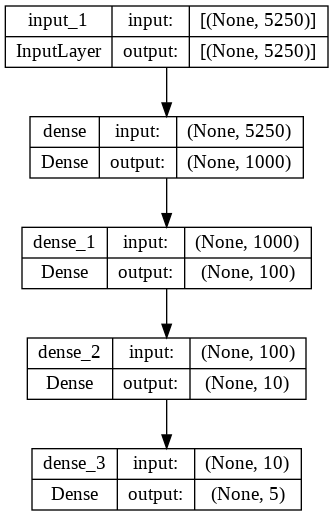

In [ ]:
from keras.utils import plot_model
plot_model(Neural_Network_Model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
type(y_train_nn)

numpy.ndarray

In [ ]:
y_train_nn.shape

(823,)

In [ ]:
execution_history = Neural_Network_Model.fit(X_NN_Input, y_train_nn , epochs = 10 , verbose=0)
print(execution_history)

In [ ]:
X_test_input = X_test_Vectorised.toarray()
pr = Neural_Network_Model.predict(X_test_input)

In [ ]:
def class_finder(y):
  list_y = list(y)
  max_val = max(list_y)
  index = 0
  for i in range(len(list_y)):
        if list_y[i] == max_val:
          index = i
  return index

In [ ]:
pr[:10]

array([[1.9016886e-02, 7.5474453e-01, 5.7923317e-02, 1.5669487e-01,
        1.1620403e-02],
       [5.9571104e-09, 2.6380988e-08, 9.9873275e-01, 2.3742361e-06,
        1.2648911e-03],
       [8.7288237e-05, 8.8539494e-08, 4.2282415e-04, 2.1303799e-04,
        9.9927688e-01],
       [1.7723566e-09, 2.3699887e-07, 9.9998039e-01, 1.6910971e-06,
        1.7690538e-05],
       [1.8776883e-03, 5.7170399e-02, 8.6003006e-01, 5.3756416e-02,
        2.7165495e-02],
       [7.7897075e-06, 1.9300058e-05, 9.7790277e-01, 3.9797986e-04,
        2.1672118e-02],
       [9.8068519e-08, 9.9998528e-01, 1.9254870e-07, 1.4314887e-05,
        1.1536129e-12],
       [1.4551533e-08, 5.0121901e-07, 9.9960428e-01, 2.1229123e-05,
        3.7399834e-04],
       [9.9265208e-06, 5.7633885e-04, 9.9752855e-01, 9.6119981e-04,
        9.2400971e-04],
       [9.4288788e-07, 7.3212595e-04, 9.9733680e-01, 1.6684919e-03,
        2.6160057e-04]], dtype=float32)

In [ ]:
y_pred_nn = []
for i in range(len(pr)):
  y_pred_nn.append(class_finder(pr[i]))

In [ ]:
set(y_pred_nn)

{0, 1, 2, 3, 4}

In [ ]:
y_pred_nn_final = []
for val in list(y_pred_nn):
  y_pred_nn_final.append(val+1)
y_pred_nn_final = np.array(y_pred_nn_final)

In [ ]:
accuracy_score(y_test,y_pred_nn_final) 

0.8954802259887006

We have got an accuracy of 90% which is pretty good but let's try one more model which is Multi Layer Perceptron Model

Let's use a Multi Layer Percepton

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,80),
                        max_iter = 400,activation = 'relu',
                        solver = 'adam')

In [ ]:
mlp_clf.fit(X_train_Vectorised,y_train)

MLPClassifier(hidden_layer_sizes=(100, 80), max_iter=400)

In [ ]:
y_pred_mlp = mlp_clf.predict(X_test_Vectorised)

In [ ]:
accuracy_score(y_test,y_pred_mlp)  

We have got an accuracy of 90% with the Multi Layer Perceptron

So we can conclude that SVM is the Best Model Used So Far,So lets make our final predictions on the actual test dataset using the SVM Trained Model

In [ ]:
final_clf_svm = SVC()

In [ ]:
indices = np.arange(Test_Vectorised.shape[0])
X_Final_Train , X_Final_Test , Y_Train_Final ,Y_Test_Final , indices_final_train , indices_final_test = train_test_split(Test_Vectorised,Y_Test_Pre_Final,indices,train_size=0.25, random_state=25,stratify = Y_Test_Pre_Final)

In [ ]:
final_clf_svm.fit(X_Final_Train,Y_Train_Final)

SVC()

In [ ]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 

In [ ]:
grid_svm = GridSearchCV( estimator = final_clf_svm , param_grid = param_grid_svm , refit = True, verbose = 4)

In [ ]:
grid_svm.fit(X_train_Vectorised , y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.612 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.758 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.806 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.806 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.799 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.799 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.491 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=4)

In [ ]:
grid_svm.best_estimator_

In [ ]:
final_clf = SVC(C=1000,gamma=0.01,kernel='linear')

In [ ]:
#Predicting with only Test Data to see its accuracy and correlation
pre_final_test_label = final_clf.fit(X_Final_Train,Y_Train_Final)
pre_final_test_label = final_clf.predict(X_Final_Test)
accuracy_score(Y_Test_Final,pre_final_test_label) 

In [ ]:
np.corrcoef(Y_Test_Final,pre_final_test_label).mean() 

In [ ]:
y_pred_final = pre_final_test_label

Now since the model is giving fairly good accuracy even with a new unknown data,we shall finalise the Comparison Data


In [ ]:
list1_text = []
list1_label = []
comparison_data = pd.DataFrame()
for val in indices_final_test:
  list1_text.append(test_data.text[val])
  list1_label.append(test_data.label[val])
comparison_data['Text_Review'] = list1_text
comparison_data['True_Label'] = list1_label
comparison_data['Predicted_Label'] = y_pred_final

In [ ]:
comparison_data

Now Exporting the Comparison Data For Study and Getting Insights on How consistent are the ratings with the reviews.

In [ ]:
comparison_data.to_csv('Amazon_Reviews_Final_Comparison_Data.csv')

As an add on let's also now try to work out a LSTM Model which is very good for Text Classification

RNN is widely used neural network architecture for NLP. It has proven to be comparatively accurate and efficient for building language models and in tasks of speech recognition.

RNNs are particularly useful if the prediction has to be at word-level, for instance, Named-entity recognition (NER) or Part of Speech (POS) tagging. As it stores the information for current feature as well neighboring features for prediction. A RNN maintains a memory based on history information, which enables the model to predict the current output conditioned on long distance features. Below is an example of NER using RNN.

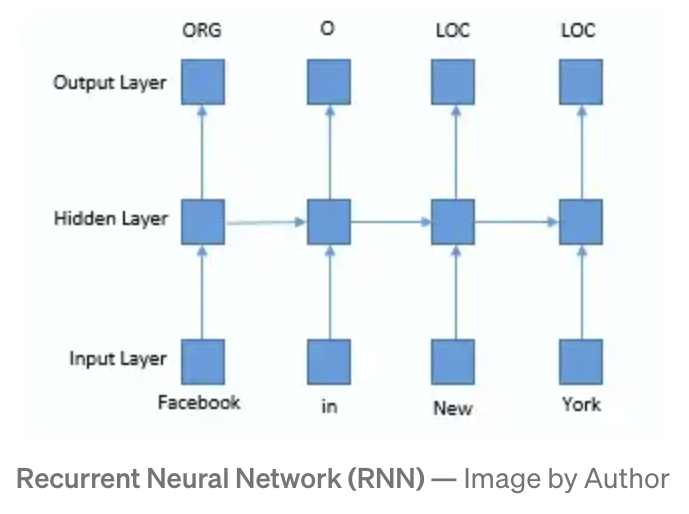

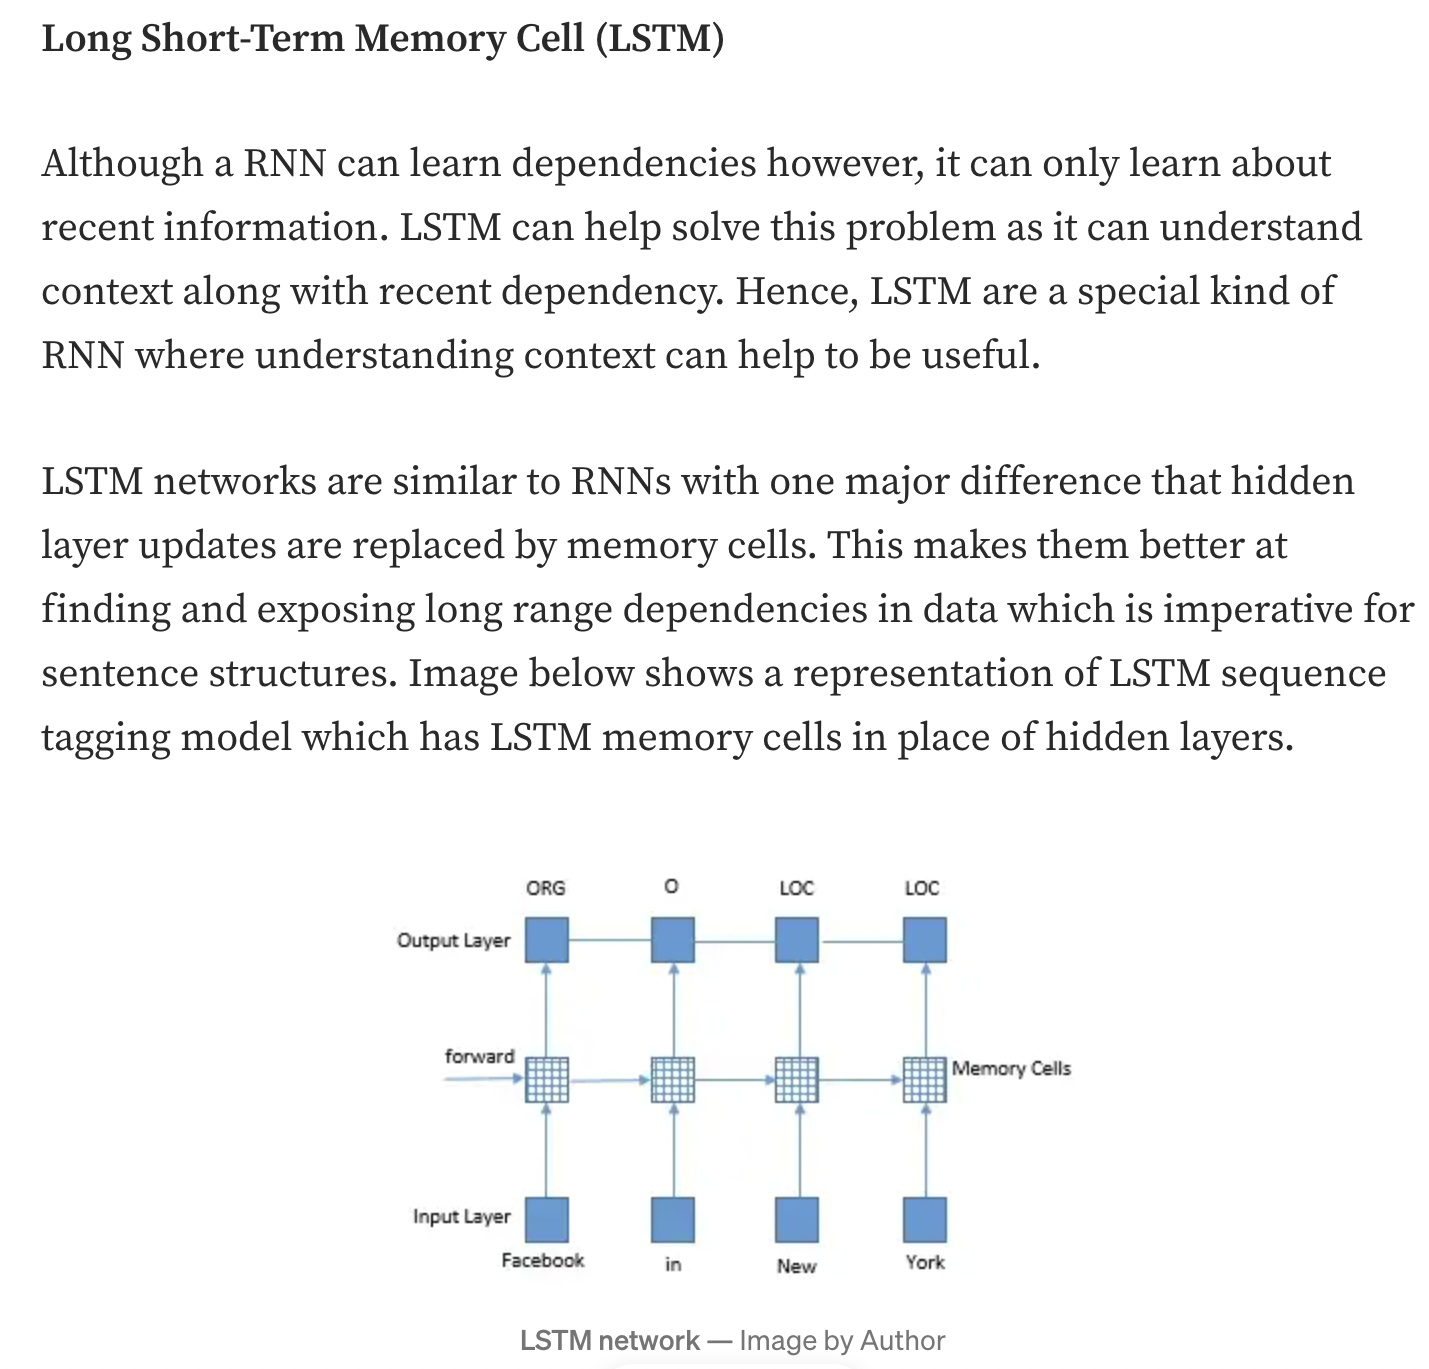

What is LSTM?
LSTM stands for Long-Short Term Memory. LSTM is a type of recurrent neural network but is better than traditional recurrent neural networks in terms of memory. Having a good hold over memorizing certain patterns LSTMs perform fairly better. As with every other NN, LSTM can have multiple hidden layers and as it passes through every layer, the relevant information is kept and all the irrelevant information gets discarded in every single cell. 

How does LSTM work?
LSTM has 3 main gates.

1. FORGET Gate
2. INPUT Gate
3. OUTPUT Gate
Let’s have a quick look at them one by one.

1.FORGET Gate :
This gate is responsible for deciding which information is kept for calculating the cell state and which is not relevant and can be discarded. The ht-1 is the information from the previous hidden state (previous cell) and xt is the information from the current cell. These are the 2 inputs given to the Forget gate. They are passed through a sigmoid function and the ones tending towards 0 are discarded, and others are passed further to calculate the cell state.

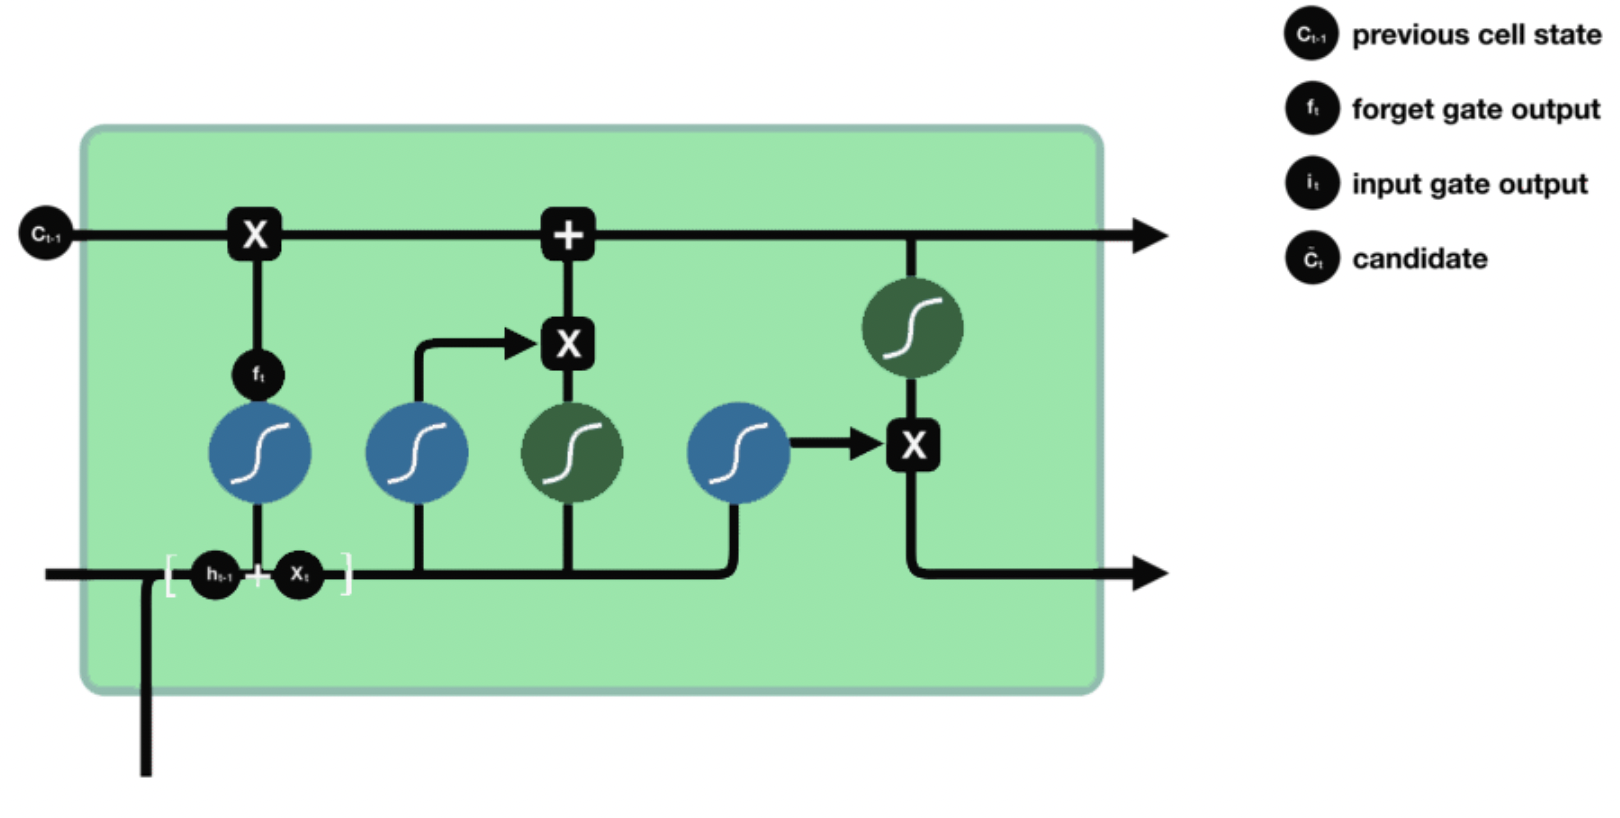

2. INPUT Gate :
Input Gate updates the cell state and decides which information is important and which is not. As forget gate helps to discard the information, the input gate helps to find out important information and store certain data in the memory that relevant. ht-1 and xt are the inputs that are both passed through sigmoid and tanh functions respectively. tanh function regulates the network and reduces bias.

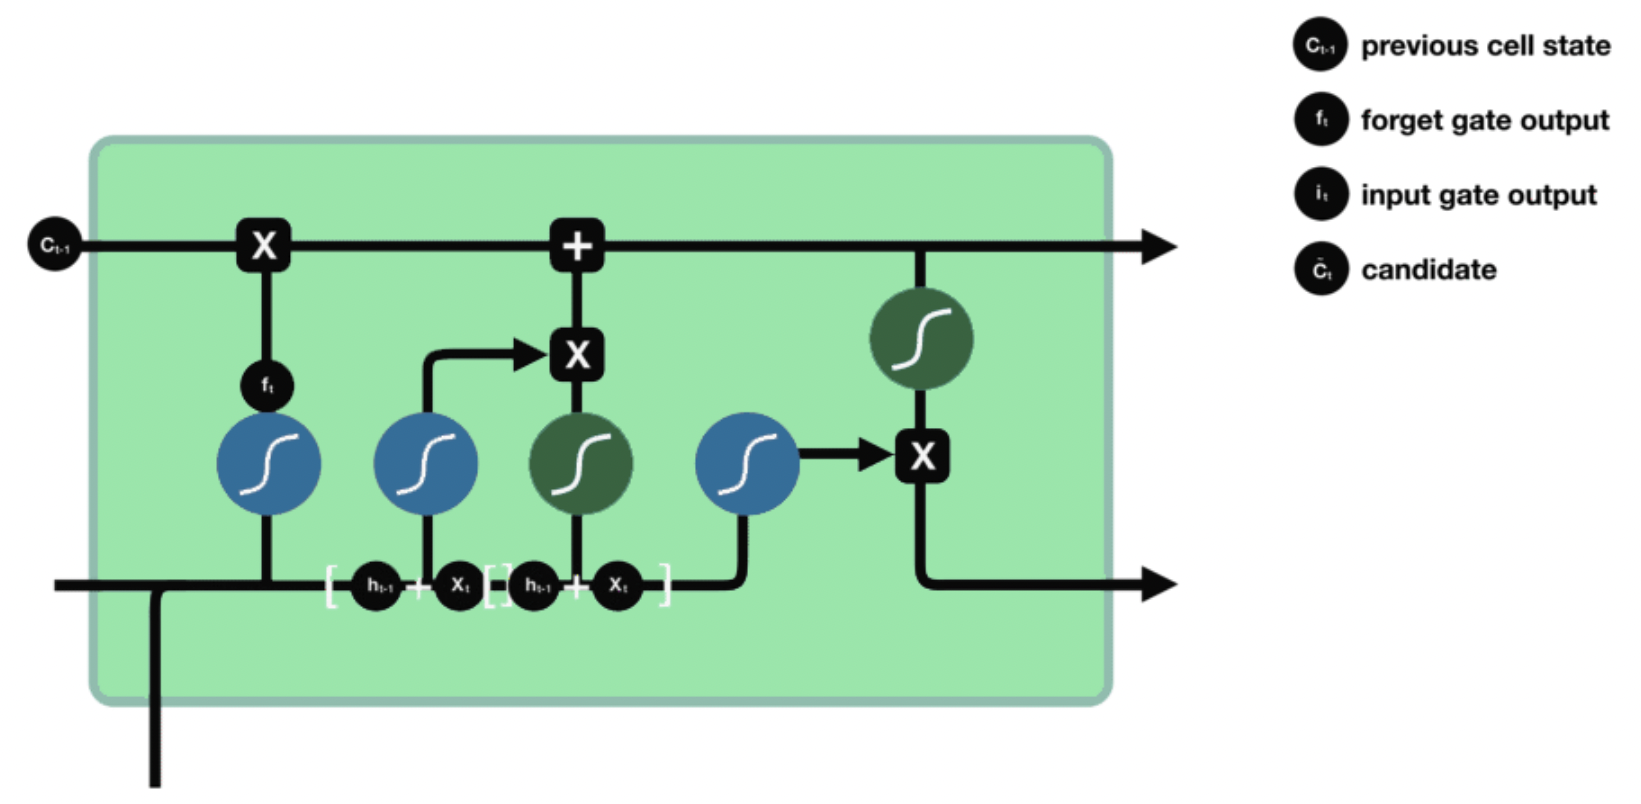

3. Cell State :
All the information gained is then used to calculate the new cell state. The cell state is first multiplied with the output of the forget gate. This has a possibility of dropping values in the cell state if it gets multiplied by values near 0. Then a pointwise addition with the output from the input gate updates the cell state to new values that the neural network finds relevant.

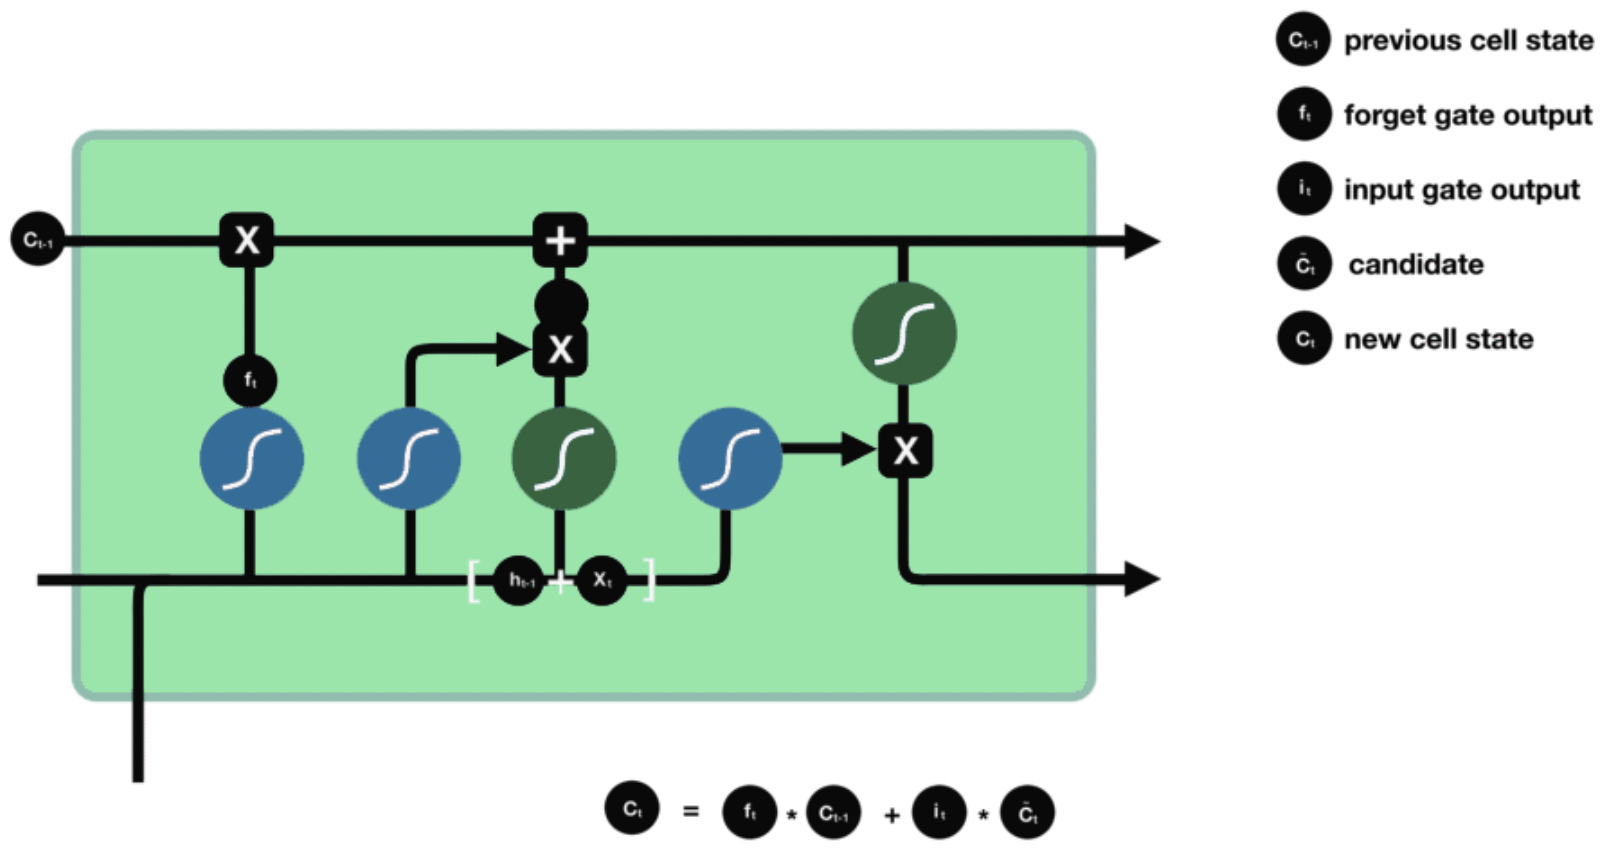

4.OUTPUT Gate :
The last gate which is the Output gate decides what the next hidden state should be. ht-1 and xt are passed to a sigmoid function. Then the newly modified cell state is passed through the tanh function and is multiplied with the sigmoid output to decide what information the hidden state should carry.

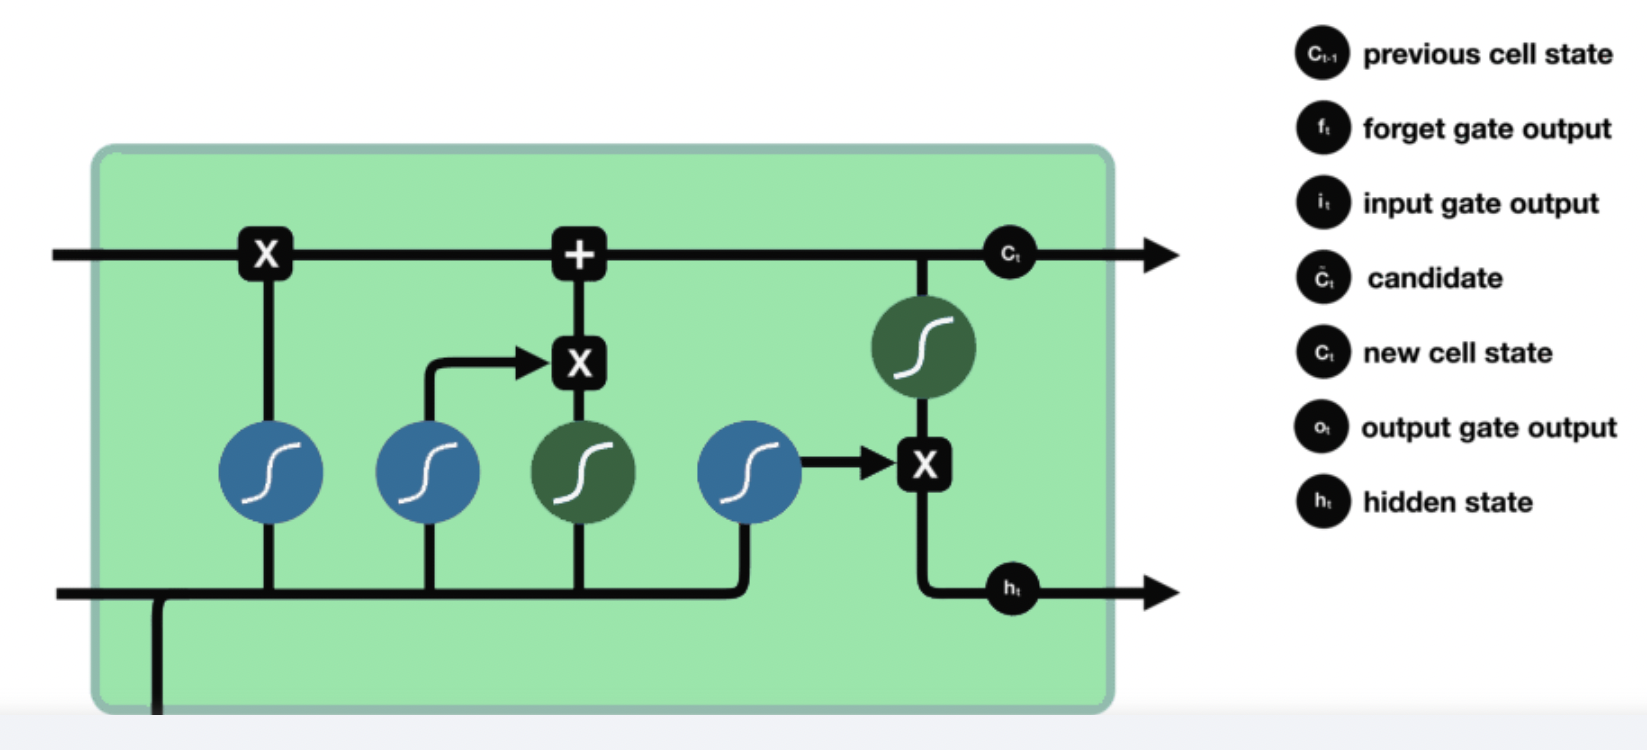

One good reason to use LSTM is that it is effective in memorizing important information.

If we look and other non-neural network classification techniques they are trained on multiple word as separate inputs that are just word having no actual meaning as a sentence, and while predicting the class it will give the output according to statistics and not according to meaning. That means, every single word is classified into one of the categories.

This is not the same in LSTM. In LSTM we can use a multiple word string to find out the class to which it belongs. This is very helpful while working with Natural language processing. If we use appropriate layers of embedding and encoding in LSTM, the model will be able to find out the actual meaning in input string and will give the most accurate output class.

In [ ]:
from keras.layers import Dense , Embedding , LSTM , SpatialDropout1D , Bidirectional

In [ ]:
X_train_Vectorised.size

In [ ]:
X_train_Vectorised.shape[1]

In [ ]:
from keras.utils import to_categorical
y_train_temp = to_categorical(y_train)

In [ ]:
model = Sequential()
model.add(Embedding(X_train_Vectorised.size,64))
#model.add(SpatialDropout1D(0.4))
#model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2,return_sequences = True)))#Return Sequences must be set to True for N-1 LSTM Layers if there are N LSTM layers(FOr example.If there are 3 LSTM Layers then there must be 2 LSTM Layers with Return Sequences = True)
model.add(Bidirectional(LSTM(64,return_sequences = True)))
model.add(LSTM(32))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          4134016   
                                                                 
 bidirectional_16 (Bidirecti  (None, None, 128)        66048     
 onal)                                                           
                                                                 
 lstm_25 (LSTM)              (None, 32)                20608     
                                                                 
 dense_20 (Dense)            (None, 64)                2112      
                                                                 
 dense_21 (Dense)            (None, 5)                 325       
                                                                 
Total params: 4,223,109
Trainable params: 4,223,109
Non-trainable params: 0
____________________________________________

In [ ]:
X_train_Vectorised.shape

(823, 5250)

In [ ]:
y_train_temp.shape

(823, 6)

In [ ]:
y_train_temp[:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
X_NN_Input.shape

(823, 5250)

In [ ]:
y_train_nn.shape

(823,)

In [ ]:
model.fit(X_NN_Input, y_train_nn ,batch_size = 32 , epochs = 3, verbose = 'auto')

Epoch 1/3
26/26 [==============================] - 412s 16s/step - loss: 1.3459 - accuracy: 0.4872
Epoch 2/3
26/26 [==============================] - 403s 15s/step - loss: 1.2265 - accuracy: 0.4872
Epoch 3/3
26/26 [==============================] - 400s 15s/step - loss: 1.2258 - accuracy: 0.4872


In [ ]:
y_pred_lstm = model.predict(X_test_input)

12/12 [==============================] - 27s 2s/step


In [ ]:
y_pred_lstm_final = []
for i in range(len(y_pred_lstm)):
  y_pred_lstm_final.append(class_finder(y_pred_lstm[i])+1)

In [ ]:
accuracy_score(y_test,y_pred_lstm_final)

0.4887005649717514

Since the accuracy score is very poor,we shall stick to our svm model and our final comparison data as our final output.
